# UN Indicators Country Analysis

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('country_profile_variables.csv')

In [ ]:
df.head()

,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),...,Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI)
0,Afghanistan,SouthernAsia,652864,35530,54.4,106.3,20270,-2.4,623.2,23.3,...,8.3,42,2.1,9.8/0.3,63,5,78.2/47.0,45.1/27.0,21.43,-99
1,Albania,SouthernEurope,28748,2930,106.9,101.9,11541,2.6,3984.2,22.4,...,63.3,130,28.2,5.7/2.0,84,36,94.9/95.2,95.5/90.2,2.96,-99
2,Algeria,NorthernAfrica,2381741,41318,17.3,102.0,164779,3.8,4154.1,12.2,...,38.2,135,0.8,145.4/3.7,5900,55,84.3/81.8,89.8/82.2,0.05,-99
3,American Samoa,Polynesia,199,56,278.2,103.6,-99,-99,-99.0,-99,...,-99,92,87.9,-99,-99,-99,100.0/100.0,62.5/62.5,-99,-99
4,Andorra,SouthernEurope,468,77,163.8,102.3,2812,0.8,39896.4,0.5,...,96.9,13,34.0,0.5/6.4,1,119,100.0/100.0,100.0/100.0,-99,-99


In [ ]:
df.shape

(229, 50)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 50 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   country                                                     229 non-null    object 
 1   Region                                                      229 non-null    object 
 2   Surface area (km2)                                          229 non-null    object 
 3   Population in thousands (2017)                              229 non-null    int64  
 4   Population density (per km2, 2017)                          229 non-null    float64
 5   Sex ratio (m per 100 f, 2017)                               229 non-null    float64
 6   GDP: Gross domestic product (million current US$)           229 non-null    int64  
 7   GDP growth rate (annual %, const. 2005 prices)              229 non-null    object 
 8   

# Data Cleaning

## Initial steps
- Surface area -> float
- GDP growth rate -> float
- Economy: Agriculture
- Employment and Unemployment(all) -> float
- Labour force participation(have to do some Feature engineering)-> can split female and male % participation rate.
- International trade(exp , imp , balance , ca) -> int (`also check these columns i see -ve in export`)
- Urban pop growth , fertility , life exp , age , migrant , refugee , infant mortality -> int and float
- Health & Education
- Mobile cellular -> float
- Threatened species -> should be int but the values are in decimals
- Energy supply per capita -> understand
- Sanitation -> float
- Drinking water -> understand

In [ ]:
df['Pop. using improved sanitation facilities (urban/rural, %)']

0      21.43
1       2.96
2       0.05
3        -99
4        -99
       ...  
224      -99
225      -99
226     2.99
227     3.96
228     6.00
Name: Pop. using improved sanitation facilities (urban/rural, %), Length: 229, dtype: object

In [ ]:
df['Labour force participation (female/male pop. %)']
# 19.3 -- 19.3% of women are working out of those who are able and willing to work or Labor force
# 83.6 -- 83.6 % of total men labor force are working

0      19.3/83.6
1      40.2/61.0
2      17.0/70.7
3        .../...
4            -99
         ...    
224          -99
225    28.6/83.3
226    26.2/73.7
227    69.9/80.9
228    78.0/87.5
Name: Labour force participation (female/male pop. %), Length: 229, dtype: object

In [ ]:
df['Surface area (km2)'].astype(int)

ValueError: ignored

In [ ]:
def convert_to_int(value):
    try:
        return int(value)
    except ValueError:
        return 0

# This code will handle exceptions because there is a value which will not get converted into int
# I will set the value equal to 0  which is giving value error

In [ ]:
df['Surface area (km2)']=df['Surface area (km2)'].apply(convert_to_int)

In [ ]:
df['Surface area (km2)'][df['Surface area (km2)'] == 0]
# Value at 91st position was giving me value error

91    0
Name: Surface area (km2), dtype: int64

In [ ]:
df['Surface area (km2)'][91]
# checking what that value was, it was ~0

0

In [ ]:
df['GDP growth rate (annual %, const. 2005 prices)'].astype(float)

ValueError: ignored

In [ ]:
def convert_to_float(value):
    try:
        return float(value)
    except ValueError:
        return 0

In [ ]:
df['GDP growth rate (annual %, const. 2005 prices)'] = df['GDP growth rate (annual %, const. 2005 prices)'].apply(convert_to_float)

In [ ]:
df['GDP growth rate (annual %, const. 2005 prices)'].describe()

count    229.000000
mean      -6.816157
std       29.694575
min      -99.000000
25%        0.600000
50%        2.700000
75%        4.200000
max       26.300000
Name: GDP growth rate (annual %, const. 2005 prices), dtype: float64

<Axes: >

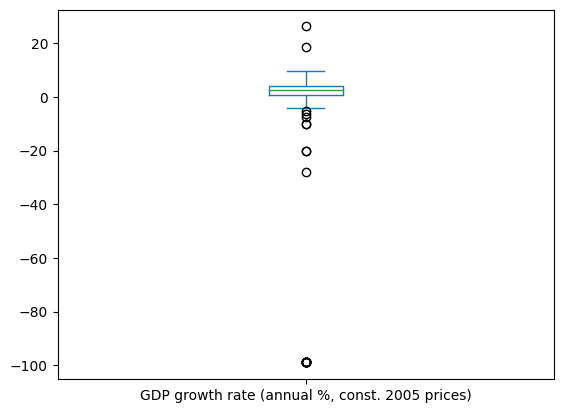

In [ ]:
df['GDP growth rate (annual %, const. 2005 prices)'].plot(kind='box')
# There are some outliers in the dataset
# a value is close to -100 and cannot be interpreted.
# This may be filled due to lack of knowledge about that point.

In [ ]:
df['Economy: Agriculture (% of GVA)'] = df['Economy: Agriculture (% of GVA)'].apply(convert_to_float)

In [ ]:
df['Economy: Agriculture (% of GVA)']
# GVA :- GVA represents the value generated by a particular sector or industry after deducting the cost of inputs and
# raw materials used in the production process.

# Here 23.3 represents the percentage share of the Agriculture sector in the Gross Value Added (GVA) of the economy.

0      23.3
1      22.4
2      12.2
3     -99.0
4       0.5
       ... 
224   -99.0
225   -99.0
226    14.7
227     8.2
228    13.0
Name: Economy: Agriculture (% of GVA), Length: 229, dtype: float64

In [ ]:
df[df[['country','Economy: Agriculture (% of GVA)']]['country'] =='India'][['country','Economy: Agriculture (% of GVA)']]

,country,Economy: Agriculture (% of GVA)
95,India,17.0


In [ ]:
# to be continued....

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 50 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   country                                                     229 non-null    object 
 1   Region                                                      229 non-null    object 
 2   Surface area (km2)                                          229 non-null    int64  
 3   Population in thousands (2017)                              229 non-null    int64  
 4   Population density (per km2, 2017)                          229 non-null    float64
 5   Sex ratio (m per 100 f, 2017)                               229 non-null    float64
 6   GDP: Gross domestic product (million current US$)           229 non-null    int64  
 7   GDP growth rate (annual %, const. 2005 prices)              229 non-null    float64
 8   

In [ ]:
df['Employment: Agriculture (% of employed)'] = df['Employment: Agriculture (% of employed)'].apply(convert_to_float)

In [ ]:
df['Employment: Industry (% of employed)'] = df['Employment: Industry (% of employed)'].apply(convert_to_float)

In [ ]:
df['Employment: Services (% of employed)'] = df['Employment: Services (% of employed)'].apply(convert_to_float)

In [ ]:
df['Labour force participation (female/male pop. %)']
# Feature Engineering required
df['Labour force participation (female)%'] = df['Labour force participation (female/male pop. %)'].apply(lambda x : x.split('/')[0])
df['Labour force participation (male)%'] = df['Labour force participation (female/male pop. %)'].apply(lambda x : x.split('/')[-1])

In [ ]:
df['Labour force participation (male)%'] = df['Labour force participation (male)%'].apply(convert_to_float)
df['Labour force participation (female)%'] = df['Labour force participation (female)%'].apply(convert_to_float)

In [ ]:
df.drop(columns='Labour force participation (female/male pop. %)' , inplace=True)

In [ ]:
df['Unemployment (% of labour force)'] = df['Unemployment (% of labour force)'].apply(convert_to_float)

In [ ]:
df['Unemployment (% of labour force)']

0       8.6
1      15.8
2      11.4
3       0.0
4     -99.0
       ... 
224   -99.0
225     6.8
226    16.1
227     7.4
228     5.0
Name: Unemployment (% of labour force), Length: 229, dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 51 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   country                                                     229 non-null    object 
 1   Region                                                      229 non-null    object 
 2   Surface area (km2)                                          229 non-null    int64  
 3   Population in thousands (2017)                              229 non-null    int64  
 4   Population density (per km2, 2017)                          229 non-null    float64
 5   Sex ratio (m per 100 f, 2017)                               229 non-null    float64
 6   GDP: Gross domestic product (million current US$)           229 non-null    int64  
 7   GDP growth rate (annual %, const. 2005 prices)              229 non-null    float64
 8   

In [ ]:
df['International trade: Exports (million US$)']=df['International trade: Exports (million US$)'].apply(convert_to_int)

In [ ]:
df['International trade: Imports (million US$)'] = df['International trade: Imports (million US$)'].apply(convert_to_int)

In [ ]:
df['International trade: Balance (million US$)'] = df['International trade: Balance (million US$)'].apply(convert_to_int)

In [ ]:
df['Balance of payments, current account (million US$)'] = df['Balance of payments, current account (million US$)'].apply(convert_to_int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 51 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   country                                                     229 non-null    object 
 1   Region                                                      229 non-null    object 
 2   Surface area (km2)                                          229 non-null    int64  
 3   Population in thousands (2017)                              229 non-null    int64  
 4   Population density (per km2, 2017)                          229 non-null    float64
 5   Sex ratio (m per 100 f, 2017)                               229 non-null    float64
 6   GDP: Gross domestic product (million current US$)           229 non-null    int64  
 7   GDP growth rate (annual %, const. 2005 prices)              229 non-null    float64
 8   

In [ ]:
df['Population growth rate (average annual %)'] = df['Population growth rate (average annual %)'].apply(convert_to_float)

In [ ]:
df['Urban population growth rate (average annual %)'] = df['Urban population growth rate (average annual %)'].apply(convert_to_float)
df['Fertility rate, total (live births per woman)'] = df['Fertility rate, total (live births per woman)'].apply(convert_to_float)

In [ ]:
df['Life expectancy at birth (females/males, years)']
# Analyze this column and create features from it

0      63.5/61.0
1      79.9/75.6
2      76.5/74.1
3      77.8/71.1
4            -99
         ...    
224    78.7/72.8
225    70.3/66.9
226    65.6/62.8
227    61.9/57.5
228    59.0/56.1
Name: Life expectancy at birth (females/males, years), Length: 229, dtype: object

In [ ]:
df['Life expectancy at birth (females/males, years)'].apply(lambda x:x.split('/')[0])
df['Life expectancy at birth (females/males, years)'].apply(lambda x:x.split('/')[1])
# check this in detail whether it is male , feemale life expectancy or female per male and years of life exp

IndexError: ignored

In [ ]:
# I have to handle the exception here
# Because it has a entry whose value is -99

In [ ]:
df['Life expectancy at birth (females/males, years)']

0      63.5/61.0
1      79.9/75.6
2      76.5/74.1
3      77.8/71.1
4            -99
         ...    
224    78.7/72.8
225    70.3/66.9
226    65.6/62.8
227    61.9/57.5
228    59.0/56.1
Name: Life expectancy at birth (females/males, years), Length: 229, dtype: object

In [ ]:
def split_col(value):
  try:
    a = value.split('/')[0]
    b = value.split('/')[1]
    return a , b
  except IndexError:
    return 0 , 0


In [ ]:
df['Life expectancy at birth (females/males, years)'] = df['Life expectancy at birth (females/males, years)'].apply(split_col)

In [ ]:
df['Life_expectancy_females'] = df['Life expectancy at birth (females/males, years)'].apply(lambda x:x[0])
df['Life_expectancy_males'] = df['Life expectancy at birth (females/males, years)'].apply(lambda x:x[1])

In [ ]:
# Converting these new columns into float
df['Life_expectancy_females'] = df['Life_expectancy_females'].apply(convert_to_float)
df['Life_expectancy_males'] = df['Life_expectancy_males'].apply(convert_to_float)

In [ ]:
df['Life_expectancy_males']

0      61.0
1      75.6
2      74.1
3      71.1
4       0.0
       ... 
224    72.8
225    66.9
226    62.8
227    57.5
228    56.1
Name: Life_expectancy_males, Length: 229, dtype: float64

In [ ]:
# Dropping the column
df.drop(columns=['Life expectancy at birth (females/males, years)'] , inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 52 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   country                                                     229 non-null    object 
 1   Region                                                      229 non-null    object 
 2   Surface area (km2)                                          229 non-null    int64  
 3   Population in thousands (2017)                              229 non-null    int64  
 4   Population density (per km2, 2017)                          229 non-null    float64
 5   Sex ratio (m per 100 f, 2017)                               229 non-null    float64
 6   GDP: Gross domestic product (million current US$)           229 non-null    int64  
 7   GDP growth rate (annual %, const. 2005 prices)              229 non-null    float64
 8   

In [ ]:
df['Population age distribution (0-14 / 60+ years, %)']
# First value -- % of total population between 0-14
# Second value -- % of population above 60 years

0       43.2/4.1
1      17.4/19.0
2       29.3/9.4
3       33.3/9.0
4      14.4/19.0
         ...    
224    25.5/15.4
225     28.1/5.4
226     39.9/4.6
227     44.8/3.7
228     41.2/4.2
Name: Population age distribution (0-14 / 60+ years, %), Length: 229, dtype: object

In [ ]:
df['Population age distribution (0-14 / 60+ years, %)'] = df['Population age distribution (0-14 / 60+ years, %)'].apply(split_col)

In [ ]:
df['Population_percent_(0-14)'] = df['Population age distribution (0-14 / 60+ years, %)'].apply(lambda x:x[0])
df['Population_percent_(60+)'] = df['Population age distribution (0-14 / 60+ years, %)'].apply(lambda x:x[1])

In [ ]:
df['Population_percent_(0-14)'] = df['Population_percent_(0-14)'].apply(convert_to_float)
df['Population_percent_(60+)'] = df['Population_percent_(60+)'].apply(convert_to_float)

In [ ]:
df.drop(columns=['Population age distribution (0-14 / 60+ years, %)'] , inplace=True)

In [ ]:
df['International migrant stock (000/% of total pop.)']
# First value-> telling the number of migrants in thousands
# Second Value-> percentage of migrants in total population

0      382.4/1.2
1       57.6/2.0
2      242.4/0.6
3      23.2/41.8
4      42.1/59.7
         ...    
224     2.8/21.7
225      5.2/0.9
226    344.1/1.3
227    127.9/0.8
228    398.9/2.6
Name: International migrant stock (000/% of total pop.), Length: 229, dtype: object

In [ ]:
df['International migrant stock (000/% of total pop.)'] = df['International migrant stock (000/% of total pop.)'].apply(split_col)

In [ ]:
df['International migrant stock (000/% of total pop.)']

0      (382.4, 1.2)
1       (57.6, 2.0)
2      (242.4, 0.6)
3      (23.2, 41.8)
4      (42.1, 59.7)
           ...     
224     (2.8, 21.7)
225      (5.2, 0.9)
226    (344.1, 1.3)
227    (127.9, 0.8)
228    (398.9, 2.6)
Name: International migrant stock (000/% of total pop.), Length: 229, dtype: object

In [ ]:
df['Migrant_population(in thousands)'] = df['International migrant stock (000/% of total pop.)'].apply(lambda x:x[0])
df['Migration_population(percentage)'] = df['International migrant stock (000/% of total pop.)'].apply(lambda x:x[1])

In [ ]:
df['Migration_population(percentage)']

0       1.2
1       2.0
2       0.6
3      41.8
4      59.7
       ... 
224    21.7
225     0.9
226     1.3
227     0.8
228     2.6
Name: Migration_population(percentage), Length: 229, dtype: object

In [ ]:
df['Migrant_population(in thousands)'] = df['Migrant_population(in thousands)'].apply(convert_to_float)
df['Migration_population(percentage)'] = df['Migration_population(percentage)'].apply(convert_to_float)

In [ ]:
# can multiply by 1000?
df['Migrant_population'] = df['Migrant_population(in thousands)']*1000
df['Migrant_population'] = df['Migrant_population'].apply(convert_to_int)

In [ ]:
df.drop(columns=['Migrant_population(in thousands)' , 'International migrant stock (000/% of total pop.)'] , inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 54 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   country                                                     229 non-null    object 
 1   Region                                                      229 non-null    object 
 2   Surface area (km2)                                          229 non-null    int64  
 3   Population in thousands (2017)                              229 non-null    int64  
 4   Population density (per km2, 2017)                          229 non-null    float64
 5   Sex ratio (m per 100 f, 2017)                               229 non-null    float64
 6   GDP: Gross domestic product (million current US$)           229 non-null    int64  
 7   GDP growth rate (annual %, const. 2005 prices)              229 non-null    float64
 8   

In [ ]:
df['Health: Physicians (per 1000 pop.)']
# Number of doctors per 1000 patients

0      0.3
1      1.3
2      ...
3      -99
4      3.7
      ... 
224    -99
225    -99
226    0.3
227    0.2
228    0.1
Name: Health: Physicians (per 1000 pop.), Length: 229, dtype: object

In [ ]:
df['Health: Physicians (per 1000 pop.)'] = df['Health: Physicians (per 1000 pop.)'].apply(convert_to_float)

In [ ]:
df['Education: Government expenditure (% of GDP)'] = df['Education: Government expenditure (% of GDP)'].apply(convert_to_float)

In [ ]:
df['Education: Primary gross enrol. ratio (f/m per 100 pop.)']
# Gross enrollment ratio -> total enrollment regardless of age to the population of that age group.
# GER may exceed 100 because of under-age or over-age enrollments.
# Suppose a person's age is more that the age of persons who usually enroll.
# Therefore, the person is overage.

0       91.1/131.6
1      111.7/115.5
2      112.7/119.5
3              -99
4              -99
          ...     
224            -99
225            -99
226     88.9/105.7
227    104.0/103.3
228     99.1/100.8
Name: Education: Primary gross enrol. ratio (f/m per 100 pop.), Length: 229, dtype: object

In [ ]:
df['Education: Primary gross enrol. ratio (f/m per 100 pop.)'] = df['Education: Primary gross enrol. ratio (f/m per 100 pop.)'].apply(split_col)

In [ ]:
df['Education: Primary gross enrol. ratio female (per 100 pop.)'] = df['Education: Primary gross enrol. ratio (f/m per 100 pop.)'].apply(lambda x:x[0])
df['Education: Primary gross enrol. ratio male (per 100 pop.)'] = df['Education: Primary gross enrol. ratio (f/m per 100 pop.)'].apply(lambda x:x[1])

In [ ]:
df['Education: Primary gross enrol. ratio female (per 100 pop.)'] = df['Education: Primary gross enrol. ratio female (per 100 pop.)'].apply(convert_to_float)
df['Education: Primary gross enrol. ratio male (per 100 pop.)'] = df['Education: Primary gross enrol. ratio male (per 100 pop.)'].apply(convert_to_float)

In [ ]:
df.drop(columns=['Education: Primary gross enrol. ratio (f/m per 100 pop.)'] , inplace=True)

In [ ]:
df['Education: Secondary gross enrol. ratio (f/m per 100 pop.)'] = df['Education: Secondary gross enrol. ratio (f/m per 100 pop.)'].apply(split_col)
df['Education: Secondary gross enrol. ratio female (per 100 pop.)'] = df['Education: Secondary gross enrol. ratio (f/m per 100 pop.)'].apply(lambda x:x[0])
df['Education: Secondary gross enrol. ratio male (per 100 pop.)'] = df['Education: Secondary gross enrol. ratio (f/m per 100 pop.)'].apply(lambda x:x[1])
df['Education: Secondary gross enrol. ratio female (per 100 pop.)'] = df['Education: Secondary gross enrol. ratio female (per 100 pop.)'].apply(convert_to_float)
df['Education: Secondary gross enrol. ratio male (per 100 pop.)'] = df['Education: Secondary gross enrol. ratio male (per 100 pop.)'].apply(convert_to_float)
df.drop(columns=['Education: Secondary gross enrol. ratio (f/m per 100 pop.)'] , inplace=True)

In [ ]:
df['Education: Tertiary gross enrol. ratio (f/m per 100 pop.)'] = df['Education: Tertiary gross enrol. ratio (f/m per 100 pop.)'].apply(split_col)
df['Education: Tertiary gross enrol. ratio female (per 100 pop.)'] = df['Education: Tertiary gross enrol. ratio (f/m per 100 pop.)'].apply(lambda x:x[0])
df['Education: Tertiary gross enrol. ratio male (per 100 pop.)'] = df['Education: Tertiary gross enrol. ratio (f/m per 100 pop.)'].apply(lambda x:x[1])
df['Education: Tertiary gross enrol. ratio female (per 100 pop.)'] = df['Education: Tertiary gross enrol. ratio female (per 100 pop.)'].apply(convert_to_float)
df['Education: Tertiary gross enrol. ratio male (per 100 pop.)'] = df['Education: Tertiary gross enrol. ratio male (per 100 pop.)'].apply(convert_to_float)
df.drop(columns=['Education: Tertiary gross enrol. ratio (f/m per 100 pop.)'] , inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 57 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   country                                                        229 non-null    object 
 1   Region                                                         229 non-null    object 
 2   Surface area (km2)                                             229 non-null    int64  
 3   Population in thousands (2017)                                 229 non-null    int64  
 4   Population density (per km2, 2017)                             229 non-null    float64
 5   Sex ratio (m per 100 f, 2017)                                  229 non-null    float64
 6   GDP: Gross domestic product (million current US$)              229 non-null    int64  
 7   GDP growth rate (annual %, const. 2005 prices)                

In [ ]:
df['Refugees and others of concern to UNHCR (in thousands)'] = df['Refugees and others of concern to UNHCR (in thousands)'].apply(convert_to_float)

In [ ]:
df['Infant mortality rate (per 1000 live births'] = df['Infant mortality rate (per 1000 live births'].apply(convert_to_float)

In [ ]:
df['Mobile-cellular subscriptions (per 100 inhabitants)'] = df['Mobile-cellular subscriptions (per 100 inhabitants)'].apply(convert_to_float)

In [ ]:
df['Mobile-cellular subscriptions (per 100 inhabitants).1'] = df['Mobile-cellular subscriptions (per 100 inhabitants).1'].apply(convert_to_float)

In [ ]:
df['Threatened species (number)'] = df['Threatened species (number)'].apply(convert_to_float)
# The interpretation of this column is not clear.
# For now , I 'll be interpreting as %of threatned species out of all species.

In [ ]:
df['Forested area (% of land area)']
# Possible interpretation-
# First value-> %of land area which is forest area
# Second value-> forest area which is not touched
# I'll just use the first value for the analysis

0        9.8/0.3
1        5.7/2.0
2      145.4/3.7
3            -99
4        0.5/6.4
         ...    
224     ~0.0/1.6
225          -99
226     22.7/0.9
227      4.5/0.3
228     12.0/0.8
Name: Forested area (% of land area), Length: 229, dtype: object

In [ ]:
df['Forested area (% of land area)'] = df['Forested area (% of land area)'].apply(split_col)
df['Forested area (% of land area)'] = df['Forested area (% of land area)'].apply(lambda x: x[0])
df['Forested area (% of land area)'] = df['Forested area (% of land area)'].apply(convert_to_float)

In [ ]:
df['Energy supply per capita (Gigajoules)']
# I'll just chose the first value

0        78.2/47.0
1        94.9/95.2
2        84.3/81.8
3      100.0/100.0
4      100.0/100.0
          ...     
224            -99
225            -99
226      72.0/46.5
227      85.6/51.3
228      97.0/67.3
Name: Energy supply per capita (Gigajoules), Length: 229, dtype: object

In [ ]:
df['Energy supply per capita (Gigajoules)'] = df['Energy supply per capita (Gigajoules)'].apply(split_col)
df['Energy supply per capita (Gigajoules)'] = df['Energy supply per capita (Gigajoules)'].apply(lambda x: x[0])
df['Energy supply per capita (Gigajoules)'] = df['Energy supply per capita (Gigajoules)'].apply(convert_to_float)

In [ ]:
df['Pop. using improved drinking water (urban/rural, %)']
# First value-> 45.1% of total pop of urban has improved drinking water
# Second value-> 27% of total pop of rural has imp drink water

0        45.1/27.0
1        95.5/90.2
2        89.8/82.2
3        62.5/62.5
4      100.0/100.0
          ...     
224            -99
225            -99
226      92.5/34.1
227      55.6/35.7
228      49.3/30.8
Name: Pop. using improved drinking water (urban/rural, %), Length: 229, dtype: object

In [ ]:
df['Pop. using improved drinking water (urban/rural, %)'] = df['Pop. using improved drinking water (urban/rural, %)'].apply(split_col)
df['Pop. using improved drinking water (urban %)'] = df['Pop. using improved drinking water (urban/rural, %)'].apply(lambda x: x[0])
df['Pop. using improved drinking water (rural, %)'] = df['Pop. using improved drinking water (urban/rural, %)'].apply(lambda x: x[1])
df['Pop. using improved drinking water (urban %)']  = df['Pop. using improved drinking water (urban %)'].apply(convert_to_float)
df['Pop. using improved drinking water (rural, %)']  = df['Pop. using improved drinking water (rural, %)'].apply(convert_to_float)
df.drop(columns=['Pop. using improved drinking water (urban/rural, %)'] , inplace=True)

In [ ]:
df['Pop. using improved sanitation facilities (urban/rural, %)']
# This point is not clear as it should have given us 2 values
# Therefore, I will not use this column
df.drop(columns=['Pop. using improved sanitation facilities (urban/rural, %)'] , inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 57 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   country                                                        229 non-null    object 
 1   Region                                                         229 non-null    object 
 2   Surface area (km2)                                             229 non-null    int64  
 3   Population in thousands (2017)                                 229 non-null    int64  
 4   Population density (per km2, 2017)                             229 non-null    float64
 5   Sex ratio (m per 100 f, 2017)                                  229 non-null    float64
 6   GDP: Gross domestic product (million current US$)              229 non-null    int64  
 7   GDP growth rate (annual %, const. 2005 prices)                

In [ ]:
df.head()

,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),...,Migration_population(percentage),Migrant_population,Education: Primary gross enrol. ratio female (per 100 pop.),Education: Primary gross enrol. ratio male (per 100 pop.),Education: Secondary gross enrol. ratio female (per 100 pop.),Education: Secondary gross enrol. ratio male (per 100 pop.),Education: Tertiary gross enrol. ratio female (per 100 pop.),Education: Tertiary gross enrol. ratio male (per 100 pop.),Pop. using improved drinking water (urban %),"Pop. using improved drinking water (rural, %)"
0,Afghanistan,SouthernAsia,652864,35530,54.4,106.3,20270,-2.4,623.2,23.3,...,1.2,382400,91.1,131.6,39.7,70.7,3.7,13.3,45.1,27.0
1,Albania,SouthernEurope,28748,2930,106.9,101.9,11541,2.6,3984.2,22.4,...,2.0,57600,111.7,115.5,92.5,98.8,68.1,48.7,95.5,90.2
2,Algeria,NorthernAfrica,2381741,41318,17.3,102.0,164779,3.8,4154.1,12.2,...,0.6,242400,112.7,119.5,101.7,98.1,45.1,28.9,89.8,82.2
3,American Samoa,Polynesia,199,56,278.2,103.6,-99,-99.0,-99.0,-99.0,...,41.8,23200,0.0,0.0,0.0,0.0,0.0,0.0,62.5,62.5
4,Andorra,SouthernEurope,468,77,163.8,102.3,2812,0.8,39896.4,0.5,...,59.7,42100,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0


# DF to CSV

In [ ]:
df.to_csv('country_variables.csv')

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('country_variables.csv')

# Steps in Analysis
- Basic (Overall Analysis)
- Region-wise Analysis
- Country-wise Analysis

## `Basic` (Overall Analysis)
- I'll go column wise

In [4]:
num_countries = df['country'].nunique()
num_countries

229

In [5]:
num_regions = df['Region'].nunique()
num_regions

22

#### `Surface area`

In [6]:
# Top 5 countries in terms of Surface area
df['Surface area (km2)'].max()

17098246

In [7]:
df['Surface area (km2)'].min()

-99

In [8]:
df[['country','Surface area (km2)']][df['Surface area (km2)'] < 20]
# I'll replace these values with their actual surface areas

,country,Surface area (km2)
25,"Bonaire, Sint Eustatius and Saba",-99
80,Gibraltar,6
91,Holy See,0
130,Mayotte,-99
133,Monaco,2
193,Sudan,-99
204,Tokelau,12


In [9]:
# Holy see(Vatican city) -> 0.44
# Bonaire, Sint Eustatius and Saba ->328
# Mayotte->374
# Sudan->1,886,068

In [10]:
df['Surface area (km2)'].iloc[25] = 328
df['Surface area (km2)'].iloc[91] = 0.44
df['Surface area (km2)'].iloc[130] = 374
df['Surface area (km2)'].iloc[193] = 1886068

<ipython-input-10-a6f472b19639>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Surface area (km2)'].iloc[25] = 328
<ipython-input-10-a6f472b19639>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Surface area (km2)'].iloc[91] = 0.44


In [11]:
df['Surface area (km2)'][df['Surface area (km2)'] < 0]

Series([], Name: Surface area (km2), dtype: float64)

In [12]:
df['Surface area (km2)'].min()

0.44

In [13]:
df['Surface area (km2)'].max()

17098246.0

In [14]:
df[(df['Surface area (km2)']==0.44) | (df['Surface area (km2)'] == 17098246.0)]['country'].values
# Russia is largest and Holy see is smallest

array(['Holy See', 'Russian Federation'], dtype=object)

In [15]:
# Top 5 Largest countries
df[['country','Surface area (km2)']].sort_values(by='Surface area (km2)' ,ascending=False).head()

,country,Surface area (km2)
167,Russian Federation,17098246.0
37,Canada,9984670.0
217,United States of America,9833517.0
45,China,9600000.0
28,Brazil,8515767.0


In [16]:
# Top 5 smallest countries
df[['country','Surface area (km2)']].sort_values(by='Surface area (km2)' ,ascending=True).head()

,country,Surface area (km2)
91,Holy See,0.44
133,Monaco,2.00
80,Gibraltar,6.00
204,Tokelau,12.00
141,Nauru,21.00


<Axes: xlabel='Region'>

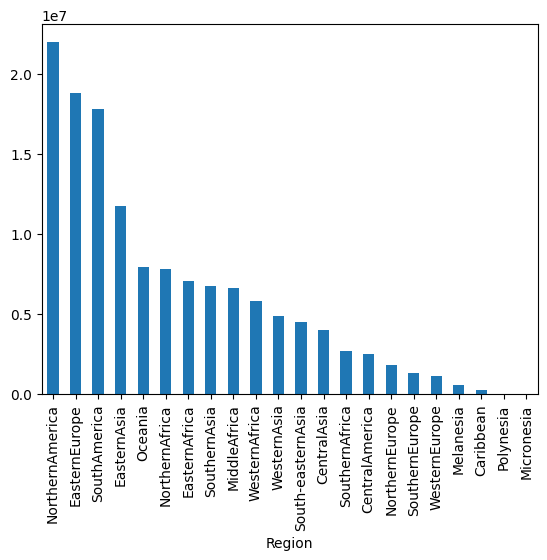

In [17]:
df.groupby('Region')['Surface area (km2)'].sum().sort_values(ascending=False).plot(kind='bar')

#### `Population`

In [18]:
# Top 5 in pop , regionwise pop , Least 5

In [19]:
df['Population in thousands (2017)'].min()

1

In [20]:
df['Population in thousands (2017)'].max()

1409517

In [21]:
df[['country' , 'Population in thousands (2017)']][df['Population in thousands (2017)'] < 100]

,country,Population in thousands (2017)
3,American Samoa,56
4,Andorra,77
6,Anguilla,15
22,Bermuda,61
25,"Bonaire, Sint Eustatius and Saba",25
29,British Virgin Islands,31
38,Cayman Islands,62
49,Cook Islands,17
59,Dominica,74
68,Falkland Islands (Malvinas),3


In [22]:
# Transforming the column by multiplying by 1000
df['Population (2017)'] = df['Population in thousands (2017)']*1000
df.drop(columns = 'Population in thousands (2017)' , inplace=True)

In [23]:
df['Population (2017)'].sum()

7501306000

In [24]:
# Top 5
df[['country' , 'Population (2017)']].sort_values(by='Population (2017)' , ascending=False).head()

,country,Population (2017)
45,China,1409517000
95,India,1339180000
217,United States of America,324460000
96,Indonesia,263991000
28,Brazil,209288000


In [25]:
# Least 5
df[['country' , 'Population (2017)']].sort_values(by='Population (2017)' , ascending=True).head()

,country,Population (2017)
204,Tokelau,1000
91,Holy See,1000
149,Niue,2000
68,Falkland Islands (Malvinas),3000
169,Saint Helena,4000


#### `Population density`

In [26]:
df[['country' , 'Population density (per km2, 2017)']][df['Population density (per km2, 2017)']<1]

,country,"Population density (per km2, 2017)"
68,Falkland Islands (Malvinas),0.2
82,Greenland,0.1


In [27]:
df[['country' , 'Population density (per km2, 2017)']].sort_values(by='Population density (per km2, 2017)' , ascending=False).head()

,country,"Population density (per km2, 2017)"
133,Monaco,25969.8
44,"China, Macao SAR",20821.6
182,Singapore,8155.5
43,"China, Hong Kong SAR",7014.2
80,Gibraltar,3457.1


In [28]:
df[['country' , 'Population density (per km2, 2017)']].sort_values(by='Population density (per km2, 2017)' , ascending=True).head()

,country,"Population density (per km2, 2017)"
82,Greenland,0.1
68,Falkland Islands (Malvinas),0.2
134,Mongolia,2.0
225,Western Sahara,2.1
140,Namibia,3.1


In [29]:
df['Population density (per km2, 2017)'].mean()

462.8248908296943

In [30]:
df

,Unnamed: 0,country,Region,Surface area (km2),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),...,Migrant_population,Education: Primary gross enrol. ratio female (per 100 pop.),Education: Primary gross enrol. ratio male (per 100 pop.),Education: Secondary gross enrol. ratio female (per 100 pop.),Education: Secondary gross enrol. ratio male (per 100 pop.),Education: Tertiary gross enrol. ratio female (per 100 pop.),Education: Tertiary gross enrol. ratio male (per 100 pop.),Pop. using improved drinking water (urban %),"Pop. using improved drinking water (rural, %)",Population (2017)
0,0,Afghanistan,SouthernAsia,652864.0,54.4,106.3,20270,-2.4,623.2,23.3,...,382400,91.1,131.6,39.7,70.7,3.7,13.3,45.1,27.0,35530000
1,1,Albania,SouthernEurope,28748.0,106.9,101.9,11541,2.6,3984.2,22.4,...,57600,111.7,115.5,92.5,98.8,68.1,48.7,95.5,90.2,2930000
2,2,Algeria,NorthernAfrica,2381741.0,17.3,102.0,164779,3.8,4154.1,12.2,...,242400,112.7,119.5,101.7,98.1,45.1,28.9,89.8,82.2,41318000
3,3,American Samoa,Polynesia,199.0,278.2,103.6,-99,-99.0,-99.0,-99.0,...,23200,0.0,0.0,0.0,0.0,0.0,0.0,62.5,62.5,56000
4,4,Andorra,SouthernEurope,468.0,163.8,102.3,2812,0.8,39896.4,0.5,...,42100,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,77000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,224,Wallis and Futuna Islands,Polynesia,142.0,84.1,93.4,-99,-99.0,-99.0,-99.0,...,2800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12000
225,225,Western Sahara,NorthernAfrica,266000.0,2.1,110.1,-99,-99.0,-99.0,-99.0,...,5200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,553000
226,226,Yemen,WesternAsia,527968.0,53.5,102.1,29688,-28.1,1106.4,14.7,...,344100,88.9,105.7,39.5,57.4,6.1,13.7,92.5,34.1,28250000
227,227,Zambia,EasternAfrica,752612.0,23.0,98.5,21255,2.9,1311.1,8.2,...,127900,104.0,103.3,0.0,0.0,3.4,4.5,55.6,35.7,17094000


In [31]:
df['Sex ratio (m per 100 f, 2017)'].describe()

count    229.000000
mean     100.202183
std       28.327837
min      -99.000000
25%       96.400000
50%       99.000000
75%      101.700000
max      301.200000
Name: Sex ratio (m per 100 f, 2017), dtype: float64

In [32]:
df['country'][df['Sex ratio (m per 100 f, 2017)'] == 301.200000]

163    Qatar
Name: country, dtype: object

In [33]:
df[['country' , 'Sex ratio (m per 100 f, 2017)']][df['Sex ratio (m per 100 f, 2017)'] < 50]

,country,"Sex ratio (m per 100 f, 2017)"
25,"Bonaire, Sint Eustatius and Saba",-99.0
169,Saint Helena,-99.0


In [34]:
	# Bonaire, Sint Eustatius and Saba	-- 107.04
  # Saint Helena -- 99.96

In [35]:
df['Sex ratio (m per 100 f, 2017)'].iloc[25] = 107.04
df['Sex ratio (m per 100 f, 2017)'].iloc[169] = 99.96

<ipython-input-35-091a0b899eda>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex ratio (m per 100 f, 2017)'].iloc[25] = 107.04
<ipython-input-35-091a0b899eda>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex ratio (m per 100 f, 2017)'].iloc[169] = 99.96


In [36]:
df[['country' , 'Sex ratio (m per 100 f, 2017)']][df['Sex ratio (m per 100 f, 2017)'] < 50]

,country,"Sex ratio (m per 100 f, 2017)"


## `Region wise`
- I'll be dividing the regions in 8 major regions.
1. North America
2. South America
3. Central America
4. Carribean
5. Europe
6. Asia
7. Africa
8. Oceania

In [37]:
df['Region'].value_counts()

Caribbean            25
EasternAfrica        19
WesternAsia          18
SouthernEurope       16
WesternAfrica        16
SouthAmerica         14
NorthernEurope       13
South-easternAsia    11
EasternEurope        10
SouthernAsia          9
Polynesia             9
MiddleAfrica          9
WesternEurope         9
CentralAmerica        8
NorthernAfrica        7
EasternAsia           7
Micronesia            7
SouthernAfrica        5
NorthernAmerica       5
Melanesia             5
CentralAsia           5
Oceania               2
Name: Region, dtype: int64

1. North America - NorthernAmerica
2. South America - SouthAmerica
3. Central America - CentralAmerica
4. Carribean - Caribbean
5. Europe - SouthernEurope,NorthernEurope,EasternEurope,WesternEurope,
6. Asia - WesternAsia,South-easternAsia,SouthernAsia,EasternAsia,CentralAsia
7. Africa - EasternAfrica,WesternAfrica,MiddleAfrica,NorthernAfrica,SouthernAfrica,
8. Oceania - Polynesia,Micronesia,Melanesia,Oceania

In [38]:
df['Region_combined'] = df['Region'].replace(['SouthernEurope','NorthernEurope','EasternEurope','WesternEurope'] , 'Europe')
df['Region_combined'] = df['Region_combined'].replace(['WesternAsia','South-easternAsia','SouthernAsia','EasternAsia','CentralAsia'] , 'Asia')
df['Region_combined'] = df['Region_combined'].replace(['EasternAfrica','WesternAfrica','MiddleAfrica','NorthernAfrica','SouthernAfrica'] , 'Africa')
df['Region_combined'] = df['Region_combined'].replace(['Polynesia','Micronesia','Melanesia','Oceania'],'Oceania')

In [39]:
val_cou = df['Region_combined'].value_counts()
val_cou = val_cou.reset_index().rename({'index' : "Region" , 'Region_combined':'Number of countries'} , axis=1)
val_cou

,Region,Number of countries
0,Africa,56
1,Asia,50
2,Europe,48
3,Caribbean,25
4,Oceania,23
5,SouthAmerica,14
6,CentralAmerica,8
7,NorthernAmerica,5


In [40]:
import plotly.express as px

In [41]:
fig = px.pie(val_cou, values='Number of countries', names='Region', title='Population of European continent')
fig.show()

In [42]:
df.columns

Index(['Unnamed: 0', 'country', 'Region', 'Surface area (km2)',
       'Population density (per km2, 2017)', 'Sex ratio (m per 100 f, 2017)',
       'GDP: Gross domestic product (million current US$)',
       'GDP growth rate (annual %, const. 2005 prices)',
       'GDP per capita (current US$)', 'Economy: Agriculture (% of GVA)',
       'Economy: Industry (% of GVA)',
       'Economy: Services and other activity (% of GVA)',
       'Employment: Agriculture (% of employed)',
       'Employment: Industry (% of employed)',
       'Employment: Services (% of employed)',
       'Unemployment (% of labour force)',
       'Agricultural production index (2004-2006=100)',
       'Food production index (2004-2006=100)',
       'International trade: Exports (million US$)',
       'International trade: Imports (million US$)',
       'International trade: Balance (million US$)',
       'Balance of payments, current account (million US$)',
       'Population growth rate (average annual %)',
       

In [43]:
df[['country' , 'GDP: Gross domestic product (million current US$)']][df['GDP: Gross domestic product (million current US$)'] == -99]

,country,GDP: Gross domestic product (million current US$)
3,American Samoa,-99
25,"Bonaire, Sint Eustatius and Saba",-99
41,Channel Islands,-99
68,Falkland Islands (Malvinas),-99
69,Faroe Islands,-99
73,French Guiana,-99
80,Gibraltar,-99
84,Guadeloupe,-99
85,Guam,-99
91,Holy See,-99


In [44]:
df['GDP: Gross domestic product (million current US$)'].iloc[3] = 600
df['GDP: Gross domestic product (million current US$)'].iloc[25] = 650
df['GDP: Gross domestic product (million current US$)'].iloc[41] = 9530
df['GDP: Gross domestic product (million current US$)'].iloc[68] = 206
df['GDP: Gross domestic product (million current US$)'].iloc[69] = 2980
df['GDP: Gross domestic product (million current US$)'].iloc[73] = 4930
df['GDP: Gross domestic product (million current US$)'].iloc[80] = 2344
df['GDP: Gross domestic product (million current US$)'].iloc[84] = 9079
df['GDP: Gross domestic product (million current US$)'].iloc[85] = 6001
df['GDP: Gross domestic product (million current US$)'].iloc[91] = 16
df['GDP: Gross domestic product (million current US$)'].iloc[100] = 6979
df['GDP: Gross domestic product (million current US$)'].iloc[127] = 8900
df['GDP: Gross domestic product (million current US$)'].iloc[130] = 2660
df['GDP: Gross domestic product (million current US$)'].iloc[149] = 24938
df['GDP: Gross domestic product (million current US$)'].iloc[150] = 1560
df['GDP: Gross domestic product (million current US$)'].iloc[169] = 38
df['GDP: Gross domestic product (million current US$)'].iloc[172] = 261
df['GDP: Gross domestic product (million current US$)'].iloc[204] = 10
df['GDP: Gross domestic product (million current US$)'].iloc[218] = 3790
df['GDP: Gross domestic product (million current US$)'].iloc[224] = 188
df['GDP: Gross domestic product (million current US$)'].iloc[225] = 908


<ipython-input-44-091df8a245b6>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-44-091df8a245b6>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-44-091df8a245b6>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-44-091df8a245b6>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

In [45]:
df[['country','GDP: Gross domestic product (million current US$)']].sort_values(by='GDP: Gross domestic product (million current US$)')

,country,GDP: Gross domestic product (million current US$)
204,Tokelau,10
91,Holy See,16
211,Tuvalu,33
169,Saint Helena,38
136,Montserrat,59
...,...,...
215,United Kingdom,2858003
78,Germany,3363600
104,Japan,4383076
45,China,11158457


In [46]:
# Top 5 Countries GDP
df[['country','GDP: Gross domestic product (million current US$)']].sort_values(by='GDP: Gross domestic product (million current US$)' , ascending=False).head()

,country,GDP: Gross domestic product (million current US$)
217,United States of America,18036648
45,China,11158457
104,Japan,4383076
78,Germany,3363600
215,United Kingdom,2858003


In [47]:
df

,Unnamed: 0,country,Region,Surface area (km2),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),...,Education: Primary gross enrol. ratio female (per 100 pop.),Education: Primary gross enrol. ratio male (per 100 pop.),Education: Secondary gross enrol. ratio female (per 100 pop.),Education: Secondary gross enrol. ratio male (per 100 pop.),Education: Tertiary gross enrol. ratio female (per 100 pop.),Education: Tertiary gross enrol. ratio male (per 100 pop.),Pop. using improved drinking water (urban %),"Pop. using improved drinking water (rural, %)",Population (2017),Region_combined
0,0,Afghanistan,SouthernAsia,652864.0,54.4,106.3,20270,-2.4,623.2,23.3,...,91.1,131.6,39.7,70.7,3.7,13.3,45.1,27.0,35530000,Asia
1,1,Albania,SouthernEurope,28748.0,106.9,101.9,11541,2.6,3984.2,22.4,...,111.7,115.5,92.5,98.8,68.1,48.7,95.5,90.2,2930000,Europe
2,2,Algeria,NorthernAfrica,2381741.0,17.3,102.0,164779,3.8,4154.1,12.2,...,112.7,119.5,101.7,98.1,45.1,28.9,89.8,82.2,41318000,Africa
3,3,American Samoa,Polynesia,199.0,278.2,103.6,600,-99.0,-99.0,-99.0,...,0.0,0.0,0.0,0.0,0.0,0.0,62.5,62.5,56000,Oceania
4,4,Andorra,SouthernEurope,468.0,163.8,102.3,2812,0.8,39896.4,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,77000,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,224,Wallis and Futuna Islands,Polynesia,142.0,84.1,93.4,188,-99.0,-99.0,-99.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12000,Oceania
225,225,Western Sahara,NorthernAfrica,266000.0,2.1,110.1,908,-99.0,-99.0,-99.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,553000,Africa
226,226,Yemen,WesternAsia,527968.0,53.5,102.1,29688,-28.1,1106.4,14.7,...,88.9,105.7,39.5,57.4,6.1,13.7,92.5,34.1,28250000,Asia
227,227,Zambia,EasternAfrica,752612.0,23.0,98.5,21255,2.9,1311.1,8.2,...,104.0,103.3,0.0,0.0,3.4,4.5,55.6,35.7,17094000,Africa


In [48]:
df[['country' , 'Population growth rate (average annual %)']][df['Population growth rate (average annual %)'] <= 0]

,country,Population growth rate (average annual %)
1,Albania,-0.1
3,American Samoa,0.0
4,Andorra,-1.6
18,Belarus,0.0
22,Bermuda,-0.6
26,Bosnia and Herzegovina,-1.0
31,Bulgaria,-0.6
49,Cook Islands,-1.2
51,Croatia,-0.4
66,Estonia,-0.3


In [49]:
df.columns

Index(['Unnamed: 0', 'country', 'Region', 'Surface area (km2)',
       'Population density (per km2, 2017)', 'Sex ratio (m per 100 f, 2017)',
       'GDP: Gross domestic product (million current US$)',
       'GDP growth rate (annual %, const. 2005 prices)',
       'GDP per capita (current US$)', 'Economy: Agriculture (% of GVA)',
       'Economy: Industry (% of GVA)',
       'Economy: Services and other activity (% of GVA)',
       'Employment: Agriculture (% of employed)',
       'Employment: Industry (% of employed)',
       'Employment: Services (% of employed)',
       'Unemployment (% of labour force)',
       'Agricultural production index (2004-2006=100)',
       'Food production index (2004-2006=100)',
       'International trade: Exports (million US$)',
       'International trade: Imports (million US$)',
       'International trade: Balance (million US$)',
       'Balance of payments, current account (million US$)',
       'Population growth rate (average annual %)',
       

In [50]:
df[['country' , 'GDP per capita (current US$)']][df['GDP per capita (current US$)']<=100]

,country,GDP per capita (current US$)
3,American Samoa,-99.0
25,"Bonaire, Sint Eustatius and Saba",-99.0
41,Channel Islands,-99.0
68,Falkland Islands (Malvinas),-99.0
69,Faroe Islands,-99.0
73,French Guiana,-99.0
80,Gibraltar,-99.0
84,Guadeloupe,-99.0
85,Guam,-99.0
91,Holy See,-99.0


In [51]:
df['GDP per capita (current US$)'][df['GDP per capita (current US$)'] != -99.0].mean()
# I could fill up the values with the mean but it is too much

15700.764423076924

<Axes: >

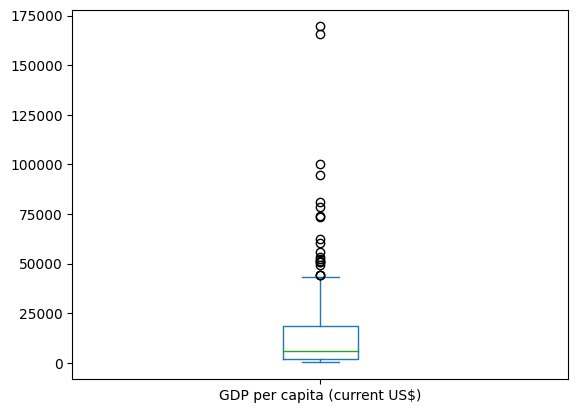

In [52]:
df['GDP per capita (current US$)'][df['GDP per capita (current US$)'] != -99.0].plot(kind='box')

In [53]:
median_gdp = df['GDP per capita (current US$)'][df['GDP per capita (current US$)'] != -99.0].median()
median_gdp
# I should fill it up with the median value

5935.450000000001

<Axes: ylabel='Frequency'>

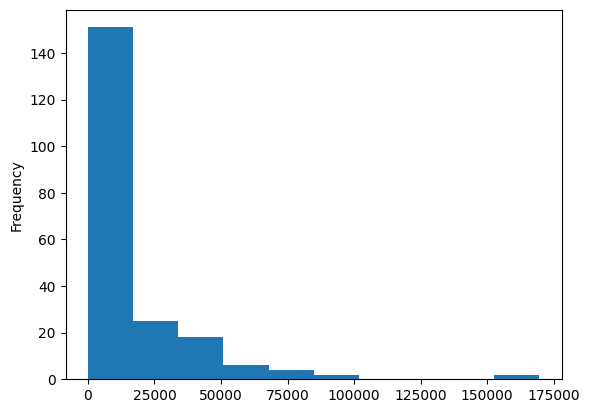

In [54]:
df['GDP per capita (current US$)'][df['GDP per capita (current US$)'] != -99.0].plot(kind='hist')

In [55]:
df['GDP per capita (current US$)'][df['GDP per capita (current US$)'] != -99.0].describe()

count       208.000000
mean      15700.764423
std       24076.063226
min         144.500000
25%        1929.775000
50%        5935.450000
75%       18617.625000
max      169491.800000
Name: GDP per capita (current US$), dtype: float64

In [56]:
df['GDP per capita (current US$)'] = df['GDP per capita (current US$)'].replace(-99.0 , median_gdp )

In [57]:
df[['country' ,'GDP per capita (current US$)']].sort_values(by = 'GDP per capita (current US$)' , ascending=True)

,country,GDP per capita (current US$)
187,Somalia,144.5
33,Burundi,244.6
39,Central African Republic,333.2
147,Niger,359.0
121,Malawi,372.9
...,...,...
197,Switzerland,80831.1
22,Bermuda,94399.9
119,Luxembourg,100160.8
133,Monaco,165870.6


In [58]:
df[['country' ,'GDP per capita (current US$)']].sort_values(by = 'GDP per capita (current US$)' , ascending=False)

,country,GDP per capita (current US$)
117,Liechtenstein,169491.8
133,Monaco,165870.6
119,Luxembourg,100160.8
22,Bermuda,94399.9
197,Switzerland,80831.1
...,...,...
121,Malawi,372.9
147,Niger,359.0
39,Central African Republic,333.2
33,Burundi,244.6


In [59]:
df[['country','GDP: Gross domestic product (million current US$)']].sort_values(by='GDP: Gross domestic product (million current US$)')

,country,GDP: Gross domestic product (million current US$)
204,Tokelau,10
91,Holy See,16
211,Tuvalu,33
169,Saint Helena,38
136,Montserrat,59
...,...,...
215,United Kingdom,2858003
78,Germany,3363600
104,Japan,4383076
45,China,11158457


In [60]:
df[['country','GDP: Gross domestic product (million current US$)']].sort_values(by='GDP: Gross domestic product (million current US$)' , ascending=False)

,country,GDP: Gross domestic product (million current US$)
217,United States of America,18036648
45,China,11158457
104,Japan,4383076
78,Germany,3363600
215,United Kingdom,2858003
...,...,...
136,Montserrat,59
169,Saint Helena,38
211,Tuvalu,33
91,Holy See,16


In [61]:
df.columns

Index(['Unnamed: 0', 'country', 'Region', 'Surface area (km2)',
       'Population density (per km2, 2017)', 'Sex ratio (m per 100 f, 2017)',
       'GDP: Gross domestic product (million current US$)',
       'GDP growth rate (annual %, const. 2005 prices)',
       'GDP per capita (current US$)', 'Economy: Agriculture (% of GVA)',
       'Economy: Industry (% of GVA)',
       'Economy: Services and other activity (% of GVA)',
       'Employment: Agriculture (% of employed)',
       'Employment: Industry (% of employed)',
       'Employment: Services (% of employed)',
       'Unemployment (% of labour force)',
       'Agricultural production index (2004-2006=100)',
       'Food production index (2004-2006=100)',
       'International trade: Exports (million US$)',
       'International trade: Imports (million US$)',
       'International trade: Balance (million US$)',
       'Balance of payments, current account (million US$)',
       'Population growth rate (average annual %)',
       

In [62]:
economy = df[['country','Economy: Agriculture (% of GVA)',
       'Economy: Industry (% of GVA)',
       'Economy: Services and other activity (% of GVA)']]

In [63]:
economy.describe()

,Economy: Agriculture (% of GVA),Economy: Industry (% of GVA),Economy: Services and other activity (% of GVA)
count,229.000000,229.000000,229.000000
mean,0.385153,15.958952,46.408734
std,35.203807,38.684631,48.603730
min,-99.000000,-99.000000,-99.000000
25%,1.400000,15.400000,47.300000
50%,5.300000,25.500000,59.500000
75%,15.500000,32.800000,70.700000
max,70.800000,79.900000,94.000000


In [64]:
# economy[['country' , 'Economy: Services and other activity (% of GVA)']]['Economy: Services and other activity (% of GVA)']==94.00
df[['country' , 'Economy: Services and other activity (% of GVA)']][df['Economy: Services and other activity (% of GVA)']==94.0]

,country,Economy: Services and other activity (% of GVA)
22,Bermuda,94.0


In [65]:
# I'll replace -99.0 with 33.33 in all the Economy columns
# I assumed that all three sectors are equally contributing
df['Economy: Agriculture (% of GVA)'] = df['Economy: Agriculture (% of GVA)'].replace(-99.0 , 33.33)
df['Economy: Industry (% of GVA)'] = df['Economy: Industry (% of GVA)'].replace(-99.0 , 33.33)
df['Economy: Services and other activity (% of GVA)'] = df['Economy: Services and other activity (% of GVA)'].replace(-99.0 , 33.33)

In [66]:
economy = df[['country','Economy: Agriculture (% of GVA)',
       'Economy: Industry (% of GVA)',
       'Economy: Services and other activity (% of GVA)']]

economy

,country,Economy: Agriculture (% of GVA),Economy: Industry (% of GVA),Economy: Services and other activity (% of GVA)
0,Afghanistan,23.30,23.30,53.30
1,Albania,22.40,26.00,51.70
2,Algeria,12.20,37.30,50.50
3,American Samoa,33.33,33.33,33.33
4,Andorra,0.50,10.80,88.60
...,...,...,...,...
224,Wallis and Futuna Islands,33.33,33.33,33.33
225,Western Sahara,33.33,33.33,33.33
226,Yemen,14.70,36.90,48.40
227,Zambia,8.20,32.30,59.50


In [67]:
# World's Economy pie-chart distribution
agr = economy['Economy: Agriculture (% of GVA)'].mean()
ind = economy['Economy: Industry (% of GVA)'].mean()
ser = economy['Economy: Services and other activity (% of GVA)'].mean()

In [68]:
px.pie(values=[agr , ind , ser], names=['Agriculture' , 'Industry' , 'Services'], title="Distribution of world's Economy")

In [69]:
df[['country','International trade: Exports (million US$)',
       'International trade: Imports (million US$)',
       'International trade: Balance (million US$)',
       'Balance of payments, current account (million US$)']]
# I can make a trade column by adding Exports & Imports

,country,International trade: Exports (million US$),International trade: Imports (million US$),International trade: Balance (million US$),"Balance of payments, current account (million US$)"
0,Afghanistan,1458,3568,-2110,-5121
1,Albania,1962,4669,-2707,-1222
2,Algeria,29992,47091,-17099,-27229
3,American Samoa,-99,-99,-99,-99
4,Andorra,100,1355,-1255,-99
...,...,...,...,...,...
224,Wallis and Futuna Islands,1,53,-51,-99
225,Western Sahara,-99,-99,-99,-99
226,Yemen,570,6861,-6291,-3026
227,Zambia,6505,7442,-937,-768


In [70]:
df['Overall Trade(million US$)'] = df['International trade: Exports (million US$)'] + df['International trade: Imports (million US$)']

In [71]:
df

,Unnamed: 0,country,Region,Surface area (km2),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),...,Education: Primary gross enrol. ratio male (per 100 pop.),Education: Secondary gross enrol. ratio female (per 100 pop.),Education: Secondary gross enrol. ratio male (per 100 pop.),Education: Tertiary gross enrol. ratio female (per 100 pop.),Education: Tertiary gross enrol. ratio male (per 100 pop.),Pop. using improved drinking water (urban %),"Pop. using improved drinking water (rural, %)",Population (2017),Region_combined,Overall Trade(million US$)
0,0,Afghanistan,SouthernAsia,652864.0,54.4,106.3,20270,-2.4,623.20,23.30,...,131.6,39.7,70.7,3.7,13.3,45.1,27.0,35530000,Asia,5026
1,1,Albania,SouthernEurope,28748.0,106.9,101.9,11541,2.6,3984.20,22.40,...,115.5,92.5,98.8,68.1,48.7,95.5,90.2,2930000,Europe,6631
2,2,Algeria,NorthernAfrica,2381741.0,17.3,102.0,164779,3.8,4154.10,12.20,...,119.5,101.7,98.1,45.1,28.9,89.8,82.2,41318000,Africa,77083
3,3,American Samoa,Polynesia,199.0,278.2,103.6,600,-99.0,5935.45,33.33,...,0.0,0.0,0.0,0.0,0.0,62.5,62.5,56000,Oceania,-198
4,4,Andorra,SouthernEurope,468.0,163.8,102.3,2812,0.8,39896.40,0.50,...,0.0,0.0,0.0,0.0,0.0,100.0,100.0,77000,Europe,1455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,224,Wallis and Futuna Islands,Polynesia,142.0,84.1,93.4,188,-99.0,5935.45,33.33,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12000,Oceania,54
225,225,Western Sahara,NorthernAfrica,266000.0,2.1,110.1,908,-99.0,5935.45,33.33,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,553000,Africa,-198
226,226,Yemen,WesternAsia,527968.0,53.5,102.1,29688,-28.1,1106.40,14.70,...,105.7,39.5,57.4,6.1,13.7,92.5,34.1,28250000,Asia,7431
227,227,Zambia,EasternAfrica,752612.0,23.0,98.5,21255,2.9,1311.10,8.20,...,103.3,0.0,0.0,3.4,4.5,55.6,35.7,17094000,Africa,13947


In [72]:
df[['country' , 'Overall Trade(million US$)']][df['Overall Trade(million US$)'] < 1]

,country,Overall Trade(million US$)
3,American Samoa,-198
25,"Bonaire, Sint Eustatius and Saba",-198
41,Channel Islands,-198
73,French Guiana,-198
84,Guadeloupe,-198
85,Guam,-198
91,Holy See,-198
100,Isle of Man,-198
117,Liechtenstein,-198
127,Martinique,-198


In [73]:
df['Overall Trade(million US$)'] = df['Overall Trade(million US$)'].replace([-198,0] , np.nan)

In [74]:
# Top 5 countries which have most trade globally
df[['country' , 'Overall Trade(million US$)']].sort_values(by='Overall Trade(million US$)' , ascending=False).head()

,country,Overall Trade(million US$)
45,China,3707677.0
217,United States of America,3702828.0
78,Germany,2401424.0
104,Japan,1251856.0
43,"China, Hong Kong SAR",1063712.0


In [75]:
# I can make a Pie chart showing % of total trade these 5 countries have in the world
# Percentage of total world trade
# I'll show top 5 and others %age in the pie chart
df['Overall Trade percentage'] = (df['Overall Trade(million US$)']/df['Overall Trade(million US$)'].sum())*100

In [76]:
trade_perc = df[['country' , 'Overall Trade percentage']].sort_values(by='Overall Trade percentage', ascending=False)
trade_perc

,country,Overall Trade percentage
45,China,11.867716
217,United States of America,11.852195
78,Germany,7.686597
104,Japan,4.007003
43,"China, Hong Kong SAR",3.404782
...,...,...
162,Puerto Rico,NaN
175,San Marino,NaN
183,Sint Maarten (Dutch part),NaN
218,United States Virgin Islands,NaN


In [77]:
trade_perc.head()

,country,Overall Trade percentage
45,China,11.867716
217,United States of America,11.852195
78,Germany,7.686597
104,Japan,4.007003
43,"China, Hong Kong SAR",3.404782


In [78]:
values = trade_perc.head(10)['Overall Trade percentage'].tolist()
values

[11.867715806949985,
 11.852194888070617,
 7.686596638269477,
 4.007002562311976,
 3.404781947414077,
 3.3654563113340767,
 3.3590994243688415,
 2.985377847631693,
 2.885885844841961,
 2.7722780960720232]

In [79]:
names = trade_perc.head(10)['country'].tolist()
names

['China',
 'United States of America',
 'Germany',
 'Japan',
 'China, Hong Kong SAR',
 'United Kingdom',
 'France',
 'Netherlands',
 'Republic of Korea',
 'Italy']

In [80]:
# Creating others by adding percentage of the remaining
others = trade_perc.iloc[10:,:]['Overall Trade percentage'].sum()
values.append(others)

In [81]:
values

[11.867715806949985,
 11.852194888070617,
 7.686596638269477,
 4.007002562311976,
 3.404781947414077,
 3.3654563113340767,
 3.3590994243688415,
 2.985377847631693,
 2.885885844841961,
 2.7722780960720232,
 45.81361063273527]

In [82]:
names.append("Others")

In [83]:
px.pie(values=values, names=names, title="World Trade Distribution")

In [84]:
df

,Unnamed: 0,country,Region,Surface area (km2),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),...,Education: Secondary gross enrol. ratio female (per 100 pop.),Education: Secondary gross enrol. ratio male (per 100 pop.),Education: Tertiary gross enrol. ratio female (per 100 pop.),Education: Tertiary gross enrol. ratio male (per 100 pop.),Pop. using improved drinking water (urban %),"Pop. using improved drinking water (rural, %)",Population (2017),Region_combined,Overall Trade(million US$),Overall Trade percentage
0,0,Afghanistan,SouthernAsia,652864.0,54.4,106.3,20270,-2.4,623.20,23.30,...,39.7,70.7,3.7,13.3,45.1,27.0,35530000,Asia,5026.0,0.016087
1,1,Albania,SouthernEurope,28748.0,106.9,101.9,11541,2.6,3984.20,22.40,...,92.5,98.8,68.1,48.7,95.5,90.2,2930000,Europe,6631.0,0.021225
2,2,Algeria,NorthernAfrica,2381741.0,17.3,102.0,164779,3.8,4154.10,12.20,...,101.7,98.1,45.1,28.9,89.8,82.2,41318000,Africa,77083.0,0.246731
3,3,American Samoa,Polynesia,199.0,278.2,103.6,600,-99.0,5935.45,33.33,...,0.0,0.0,0.0,0.0,62.5,62.5,56000,Oceania,NaN,NaN
4,4,Andorra,SouthernEurope,468.0,163.8,102.3,2812,0.8,39896.40,0.50,...,0.0,0.0,0.0,0.0,100.0,100.0,77000,Europe,1455.0,0.004657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,224,Wallis and Futuna Islands,Polynesia,142.0,84.1,93.4,188,-99.0,5935.45,33.33,...,0.0,0.0,0.0,0.0,0.0,0.0,12000,Oceania,54.0,0.000173
225,225,Western Sahara,NorthernAfrica,266000.0,2.1,110.1,908,-99.0,5935.45,33.33,...,0.0,0.0,0.0,0.0,0.0,0.0,553000,Africa,NaN,NaN
226,226,Yemen,WesternAsia,527968.0,53.5,102.1,29688,-28.1,1106.40,14.70,...,39.5,57.4,6.1,13.7,92.5,34.1,28250000,Asia,7431.0,0.023786
227,227,Zambia,EasternAfrica,752612.0,23.0,98.5,21255,2.9,1311.10,8.20,...,0.0,0.0,3.4,4.5,55.6,35.7,17094000,Africa,13947.0,0.044642


In [85]:
df['Employment: Agriculture (% of employed)'] = df['Employment: Agriculture (% of employed)'].replace(-99 , np.nan)
df['Employment: Industry (% of employed)'] = df['Employment: Industry (% of employed)'].replace(-99 , np.nan)
df['Employment: Services (% of employed)'] = df['Employment: Services (% of employed)'].replace(-99 , np.nan)
df['Unemployment (% of labour force)'] = df['Unemployment (% of labour force)'].replace(-99 , np.nan)

# This is Good for country-wise Analysis
# We can however analyse unemployed here

In [86]:
df[['country',  'Unemployment (% of labour force)']].sort_values(by = 'Unemployment (% of labour force)' , ascending=False).head()
# This data is not trustworthy
# Therefore, will not use it in Analysis

,country,Unemployment (% of labour force)
186,Solomon Islands,31.4
76,Gambia,29.7
114,Lesotho,27.5
201,The former Yugoslav Republic of Macedonia,27.3
84,Guadeloupe,26.1


In [87]:
df['Fertility rate, total (live births per woman)'] = df['Fertility rate, total (live births per woman)'].replace([0.0 , -99.0] , np.nan)

In [88]:
df[['country','Fertility rate, total (live births per woman)']].sort_values(by='Fertility rate, total (live births per woman)',ascending=False).head()

,country,"Fertility rate, total (live births per woman)"
147,Niger,7.4
187,Somalia,6.6
56,Democratic Republic of the Congo,6.4
124,Mali,6.4
40,Chad,6.3


In [89]:
df[['country','Fertility rate, total (live births per woman)']].sort_values(by='Fertility rate, total (live births per woman)',ascending=True).head()

,country,"Fertility rate, total (live births per woman)"
43,"China, Hong Kong SAR",1.2
182,Singapore,1.2
4,Andorra,1.2
44,"China, Macao SAR",1.2
164,Republic of Korea,1.2


In [90]:
df['Infant mortality rate (per 1000 live births'] = df['Infant mortality rate (per 1000 live births'].replace(-99.0 , np.nan )
df['Infant mortality rate (per 1000 live births'].iloc[211] = 20.6
df['Infant mortality rate (per 1000 live births'].iloc[224] = 4.07

<ipython-input-90-0eb3bd5888b3>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-90-0eb3bd5888b3>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [91]:
df[['country','Infant mortality rate (per 1000 live births']].sort_values(by='Infant mortality rate (per 1000 live births',ascending=False).head()

,country,Infant mortality rate (per 1000 live births
181,Sierra Leone,94.4
39,Central African Republic,93.5
40,Chad,91.2
87,Guinea-Bissau,80.4
187,Somalia,79.5


In [92]:
df[['country','Infant mortality rate (per 1000 live births']].sort_values(by='Infant mortality rate (per 1000 live births',ascending=True).head()

,country,Infant mortality rate (per 1000 live births
94,Iceland,1.6
43,"China, Hong Kong SAR",1.6
182,Singapore,2.1
104,Japan,2.2
71,Finland,2.3


In [93]:
df.columns

Index(['Unnamed: 0', 'country', 'Region', 'Surface area (km2)',
       'Population density (per km2, 2017)', 'Sex ratio (m per 100 f, 2017)',
       'GDP: Gross domestic product (million current US$)',
       'GDP growth rate (annual %, const. 2005 prices)',
       'GDP per capita (current US$)', 'Economy: Agriculture (% of GVA)',
       'Economy: Industry (% of GVA)',
       'Economy: Services and other activity (% of GVA)',
       'Employment: Agriculture (% of employed)',
       'Employment: Industry (% of employed)',
       'Employment: Services (% of employed)',
       'Unemployment (% of labour force)',
       'Agricultural production index (2004-2006=100)',
       'Food production index (2004-2006=100)',
       'International trade: Exports (million US$)',
       'International trade: Imports (million US$)',
       'International trade: Balance (million US$)',
       'Balance of payments, current account (million US$)',
       'Population growth rate (average annual %)',
       

In [94]:
emp = df[['country','Employment: Agriculture (% of employed)','Employment: Industry (% of employed)','Employment: Services (% of employed)']]
emp

,country,Employment: Agriculture (% of employed),Employment: Industry (% of employed),Employment: Services (% of employed)
0,Afghanistan,61.6,10.0,28.5
1,Albania,41.4,18.3,40.3
2,Algeria,10.8,34.5,54.7
3,American Samoa,0.0,0.0,0.0
4,Andorra,NaN,NaN,NaN
...,...,...,...,...
224,Wallis and Futuna Islands,NaN,NaN,NaN
225,Western Sahara,37.4,27.9,34.7
226,Yemen,32.9,17.9,49.2
227,Zambia,54.8,9.9,35.3


In [95]:
df.columns

Index(['Unnamed: 0', 'country', 'Region', 'Surface area (km2)',
       'Population density (per km2, 2017)', 'Sex ratio (m per 100 f, 2017)',
       'GDP: Gross domestic product (million current US$)',
       'GDP growth rate (annual %, const. 2005 prices)',
       'GDP per capita (current US$)', 'Economy: Agriculture (% of GVA)',
       'Economy: Industry (% of GVA)',
       'Economy: Services and other activity (% of GVA)',
       'Employment: Agriculture (% of employed)',
       'Employment: Industry (% of employed)',
       'Employment: Services (% of employed)',
       'Unemployment (% of labour force)',
       'Agricultural production index (2004-2006=100)',
       'Food production index (2004-2006=100)',
       'International trade: Exports (million US$)',
       'International trade: Imports (million US$)',
       'International trade: Balance (million US$)',
       'Balance of payments, current account (million US$)',
       'Population growth rate (average annual %)',
       

# Region-wise Analysis

In [96]:
x = df[['Region_combined','Overall Trade(million US$)']].groupby('Region_combined').sum().reset_index().sort_values(by='Overall Trade(million US$)',ascending=False)
x

,Region_combined,Overall Trade(million US$)
4,Europe,11820866.0
1,Asia,11808463.0
5,NorthernAmerica,4500130.0
3,CentralAmerica,862714.0
0,Africa,858189.0
7,SouthAmerica,826432.0
6,Oceania,484490.0
2,Caribbean,80423.0


In [97]:
fig = px.bar(x, y='Region_combined', x='Overall Trade(million US$)')
fig.show()

In [98]:
x = df[['Region_combined','Overall Trade percentage']].groupby('Region_combined').sum().reset_index().sort_values(by='Overall Trade percentage',ascending=False)
x

,Region_combined,Overall Trade percentage
4,Europe,37.836812
1,Asia,37.797112
5,NorthernAmerica,14.404239
3,CentralAmerica,2.761418
0,Africa,2.746934
7,SouthAmerica,2.645284
6,Oceania,1.550780
2,Caribbean,0.257422


In [99]:
values = x['Overall Trade percentage'].tolist()

In [100]:
names = x['Region_combined'].tolist()

In [101]:
# Pie
px.pie(values=values, names=names, title="Region-wise Trade percentage")

In [102]:
df.columns

Index(['Unnamed: 0', 'country', 'Region', 'Surface area (km2)',
       'Population density (per km2, 2017)', 'Sex ratio (m per 100 f, 2017)',
       'GDP: Gross domestic product (million current US$)',
       'GDP growth rate (annual %, const. 2005 prices)',
       'GDP per capita (current US$)', 'Economy: Agriculture (% of GVA)',
       'Economy: Industry (% of GVA)',
       'Economy: Services and other activity (% of GVA)',
       'Employment: Agriculture (% of employed)',
       'Employment: Industry (% of employed)',
       'Employment: Services (% of employed)',
       'Unemployment (% of labour force)',
       'Agricultural production index (2004-2006=100)',
       'Food production index (2004-2006=100)',
       'International trade: Exports (million US$)',
       'International trade: Imports (million US$)',
       'International trade: Balance (million US$)',
       'Balance of payments, current account (million US$)',
       'Population growth rate (average annual %)',
       

In [103]:
df['Region_combined'].value_counts()

Africa             56
Asia               50
Europe             48
Caribbean          25
Oceania            23
SouthAmerica       14
CentralAmerica      8
NorthernAmerica     5
Name: Region_combined, dtype: int64

In [104]:
reg_grp = df.groupby('Region_combined')

In [105]:
reg_grp['Surface area (km2)'].sum().astype('int').sort_values(ascending=False)

Region_combined
Asia               31918635
Africa             29962765
Europe             23051597
NorthernAmerica    21984568
SouthAmerica       17801955
Oceania             8512498
CentralAmerica      2486556
Caribbean            233666
Name: Surface area (km2), dtype: int64

In [106]:
reg_grp['Population density (per km2, 2017)'].mean().sort_values(ascending=False)

Region_combined
Asia               962.754000
Europe             812.079167
Caribbean          292.224000
NorthernAmerica    258.820000
Oceania            131.221739
Africa             109.307143
CentralAmerica     104.262500
SouthAmerica        21.164286
Name: Population density (per km2, 2017), dtype: float64

In [107]:
reg = df.groupby('Region_combined')

In [108]:
pop = df[['country' , 'Region_combined' , 'Population (2017)']].groupby('Region_combined').mean().sort_values(by='Population (2017)' , ascending=False)
pop = pop.reset_index()
pop

<ipython-input-108-87b8ca1e86ad>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Region_combined,Population (2017)
0,Asia,8.961602e+07
1,NorthernAmerica,7.224140e+07
2,SouthAmerica,3.031393e+07
3,CentralAmerica,2.216475e+07
4,Africa,2.198386e+07
5,Europe,1.545994e+07
6,Oceania,1.769130e+06
7,Caribbean,1.748880e+06


In [109]:
values=pop['Population (2017)'].tolist()

In [110]:
names = pop['Region_combined'].tolist()

In [111]:
px.pie(values=values , names=names , title="Distribution of Population Region-wise")

In [112]:
data = df[['Region_combined','Fertility rate, total (live births per woman)']].groupby('Region_combined').mean().reset_index().sort_values(by='Fertility rate, total (live births per woman)')
data

,Region_combined,"Fertility rate, total (live births per woman)"
4,Europe,1.579070
5,NorthernAmerica,1.750000
2,Caribbean,2.012500
7,SouthAmerica,2.423077
3,CentralAmerica,2.462500
1,Asia,2.508000
6,Oceania,2.913043
0,Africa,4.487273


In [113]:
px.bar(data, y='Region_combined', x='Fertility rate, total (live births per woman)')

In [114]:
df.columns

Index(['Unnamed: 0', 'country', 'Region', 'Surface area (km2)',
       'Population density (per km2, 2017)', 'Sex ratio (m per 100 f, 2017)',
       'GDP: Gross domestic product (million current US$)',
       'GDP growth rate (annual %, const. 2005 prices)',
       'GDP per capita (current US$)', 'Economy: Agriculture (% of GVA)',
       'Economy: Industry (% of GVA)',
       'Economy: Services and other activity (% of GVA)',
       'Employment: Agriculture (% of employed)',
       'Employment: Industry (% of employed)',
       'Employment: Services (% of employed)',
       'Unemployment (% of labour force)',
       'Agricultural production index (2004-2006=100)',
       'Food production index (2004-2006=100)',
       'International trade: Exports (million US$)',
       'International trade: Imports (million US$)',
       'International trade: Balance (million US$)',
       'Balance of payments, current account (million US$)',
       'Population growth rate (average annual %)',
       

In [115]:
df[['Region_combined','Migrant_population']].groupby('Region_combined').sum().reset_index().sort_values(by='Migrant_population')

,Region_combined,Migrant_population
2,Caribbean,1329900
3,CentralAmerica,2040300
7,SouthAmerica,5826400
6,Oceania,8101100
0,Africa,18346900
5,NorthernAmerica,54488700
1,Asia,75080999
4,Europe,76145699


# Country-wise

In [116]:
df

,Unnamed: 0,country,Region,Surface area (km2),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),...,Education: Secondary gross enrol. ratio female (per 100 pop.),Education: Secondary gross enrol. ratio male (per 100 pop.),Education: Tertiary gross enrol. ratio female (per 100 pop.),Education: Tertiary gross enrol. ratio male (per 100 pop.),Pop. using improved drinking water (urban %),"Pop. using improved drinking water (rural, %)",Population (2017),Region_combined,Overall Trade(million US$),Overall Trade percentage
0,0,Afghanistan,SouthernAsia,652864.0,54.4,106.3,20270,-2.4,623.20,23.30,...,39.7,70.7,3.7,13.3,45.1,27.0,35530000,Asia,5026.0,0.016087
1,1,Albania,SouthernEurope,28748.0,106.9,101.9,11541,2.6,3984.20,22.40,...,92.5,98.8,68.1,48.7,95.5,90.2,2930000,Europe,6631.0,0.021225
2,2,Algeria,NorthernAfrica,2381741.0,17.3,102.0,164779,3.8,4154.10,12.20,...,101.7,98.1,45.1,28.9,89.8,82.2,41318000,Africa,77083.0,0.246731
3,3,American Samoa,Polynesia,199.0,278.2,103.6,600,-99.0,5935.45,33.33,...,0.0,0.0,0.0,0.0,62.5,62.5,56000,Oceania,NaN,NaN
4,4,Andorra,SouthernEurope,468.0,163.8,102.3,2812,0.8,39896.40,0.50,...,0.0,0.0,0.0,0.0,100.0,100.0,77000,Europe,1455.0,0.004657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,224,Wallis and Futuna Islands,Polynesia,142.0,84.1,93.4,188,-99.0,5935.45,33.33,...,0.0,0.0,0.0,0.0,0.0,0.0,12000,Oceania,54.0,0.000173
225,225,Western Sahara,NorthernAfrica,266000.0,2.1,110.1,908,-99.0,5935.45,33.33,...,0.0,0.0,0.0,0.0,0.0,0.0,553000,Africa,NaN,NaN
226,226,Yemen,WesternAsia,527968.0,53.5,102.1,29688,-28.1,1106.40,14.70,...,39.5,57.4,6.1,13.7,92.5,34.1,28250000,Asia,7431.0,0.023786
227,227,Zambia,EasternAfrica,752612.0,23.0,98.5,21255,2.9,1311.10,8.20,...,0.0,0.0,3.4,4.5,55.6,35.7,17094000,Africa,13947.0,0.044642


In [117]:
list_of_countries = df['country'].unique().tolist()

### For Country-wise data:
- Location
- Population
- GDP
- `Demographics`
- Sex-Ratio
- Urban population
- Fertility rate
- Life Expectancy
- Labor force participation
- Pie chart of Economy
- Pie chart of Exports and Imports
- Bar chart of Employment in Different sectors
-

In [118]:
df.columns

Index(['Unnamed: 0', 'country', 'Region', 'Surface area (km2)',
       'Population density (per km2, 2017)', 'Sex ratio (m per 100 f, 2017)',
       'GDP: Gross domestic product (million current US$)',
       'GDP growth rate (annual %, const. 2005 prices)',
       'GDP per capita (current US$)', 'Economy: Agriculture (% of GVA)',
       'Economy: Industry (% of GVA)',
       'Economy: Services and other activity (% of GVA)',
       'Employment: Agriculture (% of employed)',
       'Employment: Industry (% of employed)',
       'Employment: Services (% of employed)',
       'Unemployment (% of labour force)',
       'Agricultural production index (2004-2006=100)',
       'Food production index (2004-2006=100)',
       'International trade: Exports (million US$)',
       'International trade: Imports (million US$)',
       'International trade: Balance (million US$)',
       'Balance of payments, current account (million US$)',
       'Population growth rate (average annual %)',
       

In [119]:
df.head()

,Unnamed: 0,country,Region,Surface area (km2),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),...,Education: Secondary gross enrol. ratio female (per 100 pop.),Education: Secondary gross enrol. ratio male (per 100 pop.),Education: Tertiary gross enrol. ratio female (per 100 pop.),Education: Tertiary gross enrol. ratio male (per 100 pop.),Pop. using improved drinking water (urban %),"Pop. using improved drinking water (rural, %)",Population (2017),Region_combined,Overall Trade(million US$),Overall Trade percentage
0,0,Afghanistan,SouthernAsia,652864.0,54.4,106.3,20270,-2.4,623.20,23.30,...,39.7,70.7,3.7,13.3,45.1,27.0,35530000,Asia,5026.0,0.016087
1,1,Albania,SouthernEurope,28748.0,106.9,101.9,11541,2.6,3984.20,22.40,...,92.5,98.8,68.1,48.7,95.5,90.2,2930000,Europe,6631.0,0.021225
2,2,Algeria,NorthernAfrica,2381741.0,17.3,102.0,164779,3.8,4154.10,12.20,...,101.7,98.1,45.1,28.9,89.8,82.2,41318000,Africa,77083.0,0.246731
3,3,American Samoa,Polynesia,199.0,278.2,103.6,600,-99.0,5935.45,33.33,...,0.0,0.0,0.0,0.0,62.5,62.5,56000,Oceania,NaN,NaN
4,4,Andorra,SouthernEurope,468.0,163.8,102.3,2812,0.8,39896.40,0.50,...,0.0,0.0,0.0,0.0,100.0,100.0,77000,Europe,1455.0,0.004657


In [120]:
df1 = df[df['country']=='India']
df1

,Unnamed: 0,country,Region,Surface area (km2),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),...,Education: Secondary gross enrol. ratio female (per 100 pop.),Education: Secondary gross enrol. ratio male (per 100 pop.),Education: Tertiary gross enrol. ratio female (per 100 pop.),Education: Tertiary gross enrol. ratio male (per 100 pop.),Pop. using improved drinking water (urban %),"Pop. using improved drinking water (rural, %)",Population (2017),Region_combined,Overall Trade(million US$),Overall Trade percentage
95,95,India,SouthernAsia,3287263.0,450.4,107.6,2116239,7.6,1614.2,17.0,...,74.5,73.5,26.7,27.0,62.6,28.5,1339180000,Asia,617032.0,1.975027


In [121]:
# Location
df1['Region_combined'].values[0]

'Asia'

In [122]:
# Population
df1['Population (2017)']

95    1339180000
Name: Population (2017), dtype: int64

In [123]:
# GDP and GDP per capita
df1['GDP: Gross domestic product (million current US$)'] , df1['GDP per capita (current US$)']

(95    2116239
 Name: GDP: Gross domestic product (million current US$), dtype: int64,
 95    1614.2
 Name: GDP per capita (current US$), dtype: float64)

In [124]:
# Sex-ratio
df1['Sex ratio (m per 100 f, 2017)']

95    107.6
Name: Sex ratio (m per 100 f, 2017), dtype: float64

In [125]:
# Urban pop and growth
df1['Urban population (% of total population)'] , df1['Urban population growth rate (average annual %)']

(95    32.7
 Name: Urban population (% of total population), dtype: float64,
 95    2.4
 Name: Urban population growth rate (average annual %), dtype: float64)

In [126]:
# Fertility rate
df1['Fertility rate, total (live births per woman)']

95    2.4
Name: Fertility rate, total (live births per woman), dtype: float64

In [127]:
# Life Exp--Bar chart
lif_mal = df1['Life_expectancy_males']
lif_fem = df1['Life_expectancy_females']
lif_mal , lif_fem

(95    66.2
 Name: Life_expectancy_males, dtype: float64,
 95    69.1
 Name: Life_expectancy_females, dtype: float64)

In [128]:
df1

,Unnamed: 0,country,Region,Surface area (km2),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),...,Education: Secondary gross enrol. ratio female (per 100 pop.),Education: Secondary gross enrol. ratio male (per 100 pop.),Education: Tertiary gross enrol. ratio female (per 100 pop.),Education: Tertiary gross enrol. ratio male (per 100 pop.),Pop. using improved drinking water (urban %),"Pop. using improved drinking water (rural, %)",Population (2017),Region_combined,Overall Trade(million US$),Overall Trade percentage
95,95,India,SouthernAsia,3287263.0,450.4,107.6,2116239,7.6,1614.2,17.0,...,74.5,73.5,26.7,27.0,62.6,28.5,1339180000,Asia,617032.0,1.975027


In [129]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns

In [130]:
# Life expectancy data
life_expectancy = [lif_mal.values[0], lif_fem.values[0]]

# Categories
categories = ['Males', 'Females']

# Define colors for males and females
colors = ['royalblue', 'salmon']

# Create a bar trace for males and females with different colors
trace = go.Bar(x=categories, y=life_expectancy, marker=dict(color=colors))

# Create a figure and add the trace
fig = go.Figure(data=[trace])

# Update layout
fig.update_layout(
    title='Comparison of Life Expectancy by Gender',
    xaxis_title='Gender',
    yaxis_title='Life Expectancy'
)

# Show the plot
fig.show()


In [131]:
# IMR
df1['Infant mortality rate (per 1000 live births']

95    41.3
Name: Infant mortality rate (per 1000 live births, dtype: float64

In [132]:
# Labor force participation--Bar chart
df1['Labour force participation (male)%'],df1['Labour force participation (female)%']

(95    79.1
 Name: Labour force participation (male)%, dtype: float64,
 95    27.0
 Name: Labour force participation (female)%, dtype: float64)

In [133]:
lab_mal = df1['Labour force participation (male)%'].values[0]
lab_fem = df1['Labour force participation (female)%'].values[0]

In [134]:
# Life expectancy data
labour_force = [lab_mal, lab_fem]

# Categories
categories = ['Males', 'Females']

# Define colors for males and females
colors = ['royalblue', 'salmon']

# Create a bar trace for males and females with different colors
trace = go.Bar(x=categories, y=labour_force, marker=dict(color=colors))

# Create a figure and add the trace
fig = go.Figure(data=[trace])

# Update layout
fig.update_layout(
    title='Comparison of participation in Labor force by Gender',
    xaxis_title='Gender',
    yaxis_title='Labour Force participation'
)

# Show the plot
fig.show()


In [135]:
# Economy--pie chart
df1['Economy: Agriculture (% of GVA)'] ,df1['Economy: Industry (% of GVA)'] ,df1['Economy: Services and other activity (% of GVA)']

(95    17.0
 Name: Economy: Agriculture (% of GVA), dtype: float64,
 95    29.7
 Name: Economy: Industry (% of GVA), dtype: float64,
 95    53.2
 Name: Economy: Services and other activity (% of GVA), dtype: float64)

In [136]:
agr = df1['Economy: Agriculture (% of GVA)'].values[0]
ind = df1['Economy: Industry (% of GVA)'].values[0]
ser = df1['Economy: Services and other activity (% of GVA)'].values[0]

In [137]:
px.pie(values=[agr,ind,ser],names=['Agriculture','Industry','Services'])

In [138]:
# Trade
df1['International trade: Exports (million US$)'],df1['International trade: Imports (million US$)']

(95    260327
 Name: International trade: Exports (million US$), dtype: int64,
 95    356705
 Name: International trade: Imports (million US$), dtype: int64)

In [139]:
exp = df1['International trade: Exports (million US$)'].values[0]
imp = df1['International trade: Imports (million US$)'].values[0]

In [140]:
px.pie(values=[exp,imp] , names=['Export' , 'Import'])

In [141]:
# Employment--pie
df1['Employment: Agriculture (% of employed)'] , df1['Employment: Industry (% of employed)'] , df1['Employment: Services (% of employed)']

(95    44.3
 Name: Employment: Agriculture (% of employed), dtype: float64,
 95    24.5
 Name: Employment: Industry (% of employed), dtype: float64,
 95    31.2
 Name: Employment: Services (% of employed), dtype: float64)

In [142]:
emp_agr = df1['Employment: Agriculture (% of employed)'].values[0]
emp_ind = df1['Employment: Industry (% of employed)'].values[0]
emp_ser = df1['Employment: Services (% of employed)'].values[0]

In [143]:
px.pie(values=[emp_agr , emp_ind , emp_ser] , names=['Agriculture' , 'Industry' , 'Services'])

In [144]:
df.columns

Index(['Unnamed: 0', 'country', 'Region', 'Surface area (km2)',
       'Population density (per km2, 2017)', 'Sex ratio (m per 100 f, 2017)',
       'GDP: Gross domestic product (million current US$)',
       'GDP growth rate (annual %, const. 2005 prices)',
       'GDP per capita (current US$)', 'Economy: Agriculture (% of GVA)',
       'Economy: Industry (% of GVA)',
       'Economy: Services and other activity (% of GVA)',
       'Employment: Agriculture (% of employed)',
       'Employment: Industry (% of employed)',
       'Employment: Services (% of employed)',
       'Unemployment (% of labour force)',
       'Agricultural production index (2004-2006=100)',
       'Food production index (2004-2006=100)',
       'International trade: Exports (million US$)',
       'International trade: Imports (million US$)',
       'International trade: Balance (million US$)',
       'Balance of payments, current account (million US$)',
       'Population growth rate (average annual %)',
       

In [145]:
df[[ 'country','Population_percent_(0-14)',
       'Population_percent_(60+)']]
      #  I can add another column which will show population between 14-60 by adding both and subtracting from 100

df['Population_percent_(14-60)'] = 100.0 - (df['Population_percent_(0-14)'] + df['Population_percent_(60+)'])

In [146]:
# Percentages of different age peoples
x = df[[ 'country','Population_percent_(0-14)','Population_percent_(14-60)','Population_percent_(60+)']]
x

,country,Population_percent_(0-14),Population_percent_(14-60),Population_percent_(60+)
0,Afghanistan,43.2,52.7,4.1
1,Albania,17.4,63.6,19.0
2,Algeria,29.3,61.3,9.4
3,American Samoa,33.3,57.7,9.0
4,Andorra,14.4,66.6,19.0
...,...,...,...,...
224,Wallis and Futuna Islands,25.5,59.1,15.4
225,Western Sahara,28.1,66.5,5.4
226,Yemen,39.9,55.5,4.6
227,Zambia,44.8,51.5,3.7


In [147]:
values = x[x['country'] == 'India'][['Population_percent_(0-14)','Population_percent_(14-60)','Population_percent_(60+)']].values[0].tolist()

In [148]:
values

[27.8, 62.8, 9.4]

In [149]:
px.pie(names=['Youth Population(0-14)' , 'Working Population(14-60)' , 'Old Population(60+)'], values=values)

## Overall

In [157]:
df['Population (2017)'].sum()

7501306000

In [160]:
int(df['Surface area (km2)'].sum())

135952240

In [161]:
df

,Unnamed: 0,country,Region,Surface area (km2),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),...,Education: Secondary gross enrol. ratio male (per 100 pop.),Education: Tertiary gross enrol. ratio female (per 100 pop.),Education: Tertiary gross enrol. ratio male (per 100 pop.),Pop. using improved drinking water (urban %),"Pop. using improved drinking water (rural, %)",Population (2017),Region_combined,Overall Trade(million US$),Overall Trade percentage,Population_percent_(14-60)
0,0,Afghanistan,SouthernAsia,652864.0,54.4,106.3,20270,-2.4,623.20,23.30,...,70.7,3.7,13.3,45.1,27.0,35530000,Asia,5026.0,0.016087,52.7
1,1,Albania,SouthernEurope,28748.0,106.9,101.9,11541,2.6,3984.20,22.40,...,98.8,68.1,48.7,95.5,90.2,2930000,Europe,6631.0,0.021225,63.6
2,2,Algeria,NorthernAfrica,2381741.0,17.3,102.0,164779,3.8,4154.10,12.20,...,98.1,45.1,28.9,89.8,82.2,41318000,Africa,77083.0,0.246731,61.3
3,3,American Samoa,Polynesia,199.0,278.2,103.6,600,-99.0,5935.45,33.33,...,0.0,0.0,0.0,62.5,62.5,56000,Oceania,NaN,NaN,57.7
4,4,Andorra,SouthernEurope,468.0,163.8,102.3,2812,0.8,39896.40,0.50,...,0.0,0.0,0.0,100.0,100.0,77000,Europe,1455.0,0.004657,66.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,224,Wallis and Futuna Islands,Polynesia,142.0,84.1,93.4,188,-99.0,5935.45,33.33,...,0.0,0.0,0.0,0.0,0.0,12000,Oceania,54.0,0.000173,59.1
225,225,Western Sahara,NorthernAfrica,266000.0,2.1,110.1,908,-99.0,5935.45,33.33,...,0.0,0.0,0.0,0.0,0.0,553000,Africa,NaN,NaN,66.5
226,226,Yemen,WesternAsia,527968.0,53.5,102.1,29688,-28.1,1106.40,14.70,...,57.4,6.1,13.7,92.5,34.1,28250000,Asia,7431.0,0.023786,55.5
227,227,Zambia,EasternAfrica,752612.0,23.0,98.5,21255,2.9,1311.10,8.20,...,0.0,3.4,4.5,55.6,35.7,17094000,Africa,13947.0,0.044642,51.5


In [162]:
df.columns

Index(['Unnamed: 0', 'country', 'Region', 'Surface area (km2)',
       'Population density (per km2, 2017)', 'Sex ratio (m per 100 f, 2017)',
       'GDP: Gross domestic product (million current US$)',
       'GDP growth rate (annual %, const. 2005 prices)',
       'GDP per capita (current US$)', 'Economy: Agriculture (% of GVA)',
       'Economy: Industry (% of GVA)',
       'Economy: Services and other activity (% of GVA)',
       'Employment: Agriculture (% of employed)',
       'Employment: Industry (% of employed)',
       'Employment: Services (% of employed)',
       'Unemployment (% of labour force)',
       'Agricultural production index (2004-2006=100)',
       'Food production index (2004-2006=100)',
       'International trade: Exports (million US$)',
       'International trade: Imports (million US$)',
       'International trade: Balance (million US$)',
       'Balance of payments, current account (million US$)',
       'Population growth rate (average annual %)',
       